<a href="https://colab.research.google.com/github/AcuSilas/Advanced-Python-For-Data-Science-Pt2/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis on Cars Dataset

### Part 1: Cleaning the Data and performing EDA

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very *important* especially when we arrive at modeling the data in order to apply Machine learning.
The *target* variable will be price and the *independent* variables that we want to see their influence on price will be Year, HP, and Cylinders.

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Loading the data into the data frame.

df = pd.read_csv("/content/data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Dropping irrelevant columns
# For unwanted columns
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
# Renaming the column names
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)

In [ ]:

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
# Used to count the number of rows before removing the data
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:
# Dropping the duplicates
df = df.drop_duplicates()
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [ ]:
# Finding the null values.
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
# Dropping the missing values.
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

#### Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and *remove* the outliers. Because outliers are one of the primary reasons for resulting in a *less accurate* model. Hence it’s a good idea to remove them. However, in this case I am going to retain the outliers since I want to see how HP influences price and furthermore, price also has some outliers but since it is our target variable that's okay. The outlier detection and removing that I am going to perform is called *IQR* score technique. Often outliers can be seen with visualizations using a *box plot*. I will leave the code to remove outliers commented.

<Axes: xlabel='Price'>

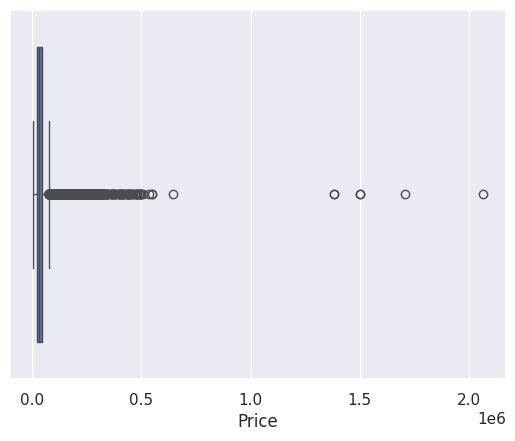

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

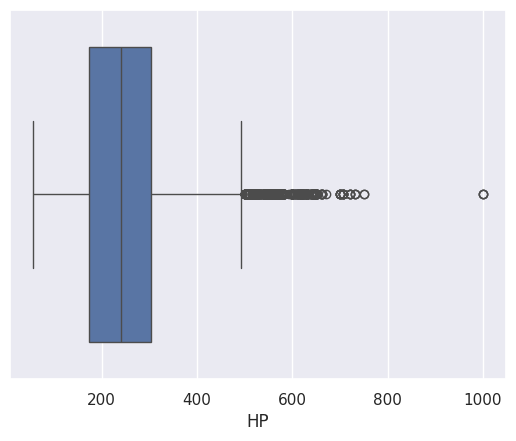

In [ ]:
sns.boxplot(x=df['HP'])

In [ ]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


In [ ]:
# Interquatile Range(IQR) is basically calculated by deleting upper quantile(Q3) from lower quantile(Q1)


selected_columns = ['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price']  # Specify the columns you want to include

# Calculate IQR for selected columns
IQR_selected = df[selected_columns].quantile(0.75) - df[selected_columns].quantile(0.25)

print(IQR_selected)


Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [ ]:
#Removing the outliers

# Q1 = df[selected_columns].quantile(0.25)
# Q3 = df[selected_columns].quantile(0.75)

# Align the indexes
# df, Q1 = df.align(Q1, axis=1, copy=False)
# df, Q3 = df.align(Q3, axis=1, copy=False)

# # Calculate IQR again after alignment
# IQR_selected = Q3 - Q1

# # Remove outliers
# df = df[~((df[selected_columns] < (Q1 - 1.5 * IQR_selected)) | (df[selected_columns] > (Q3 + 1.5 * IQR_selected))).any(axis=1)]
# df.shape

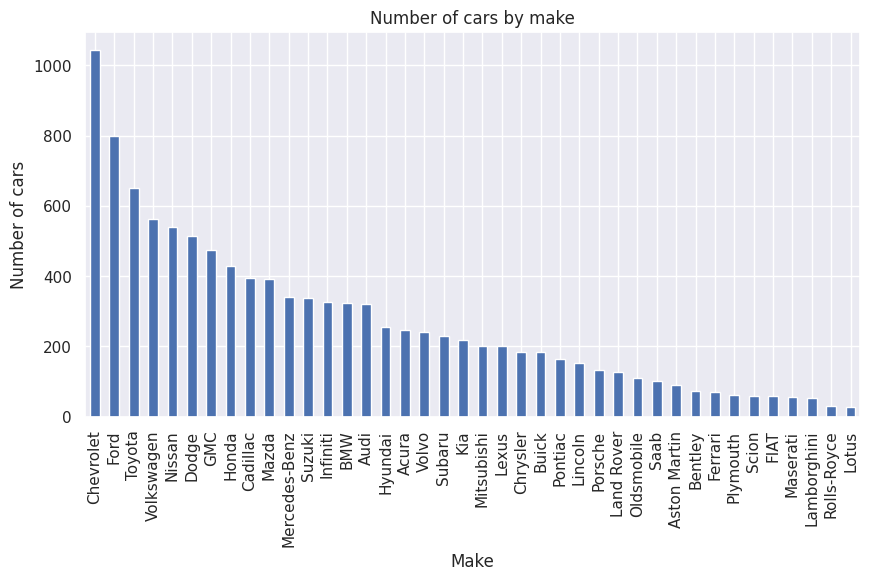

In [ ]:
# Plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


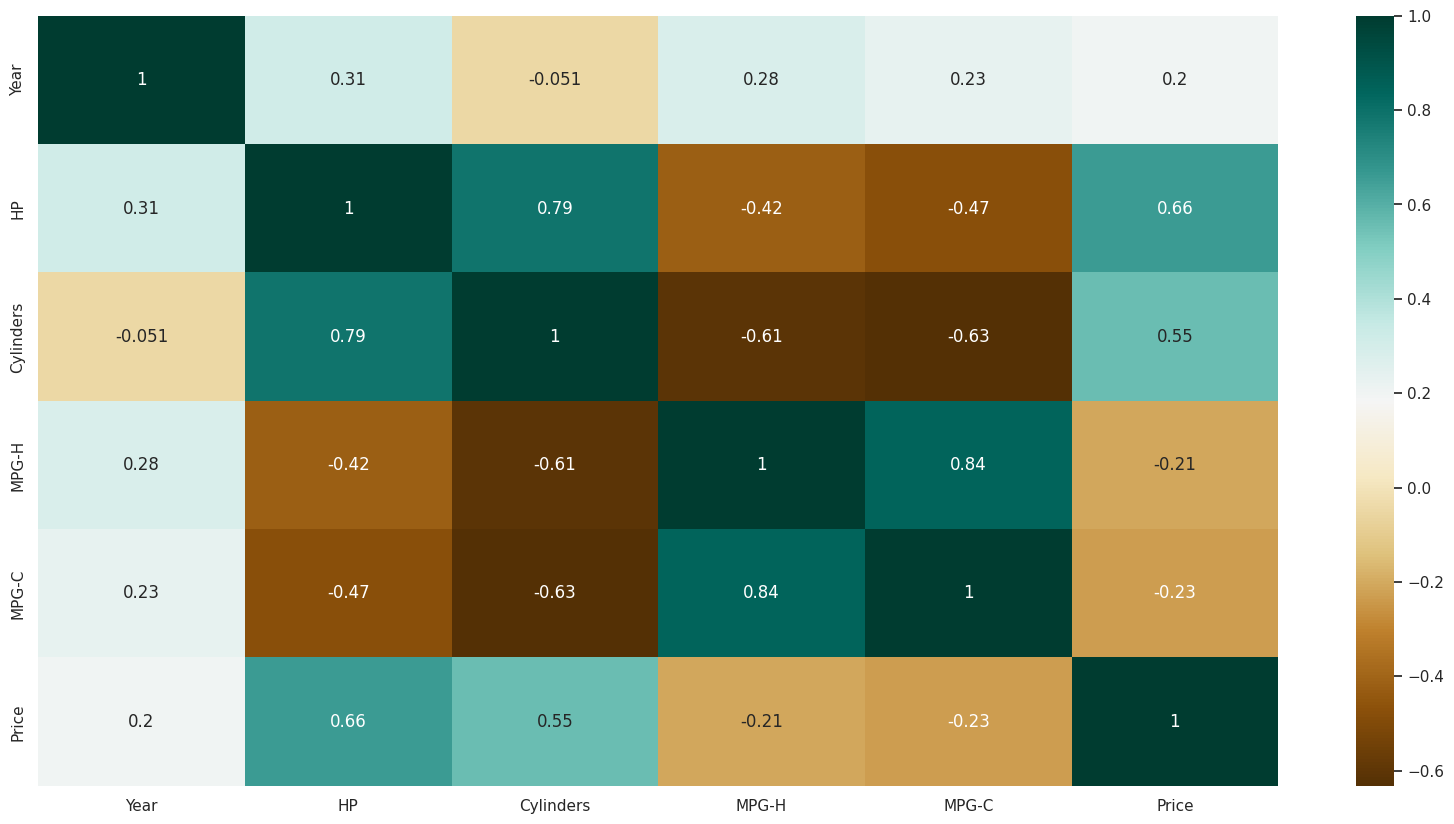

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df[selected_columns].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In the above heat map we see that the *price* feature depends mainly on the *Engine Size, Horsepower, and Cylinders*.

### Part 2 Building the regression model

In [28]:
#Importing libraries we need for this section

import statsmodels.formula.api as smf
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

 let's fit an ordinary least squares regression model using statsmodels.formula.api and then print the model summary.

In [33]:
selected_column1 = ['Year', 'HP', 'Cylinders']

independent_cols = df[selected_column1]

dependent_var = 'Price'


#Generating the regression string
formula_str = dependent_var+ ' ~ ' + ' + '.join(independent_cols)
formula_str

# Construct and fit the model
model = smf.ols(formula_str, data=df)
model = model.fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     2823.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:40:47   Log-Likelihood:            -1.3176e+05
No. Observations:               10827   AIC:                         2.635e+05
Df Residuals:                   10823   BIC:                         2.636e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.001e+05   1.58e+05     -3.175      0.0

In [34]:
model

Let's evaluate our model's results. Generate a scatter plot of the residuals against the fitted values allowing us to visually inspect whether the residuals have constant variance and are distributed randomly around the zero residual line.

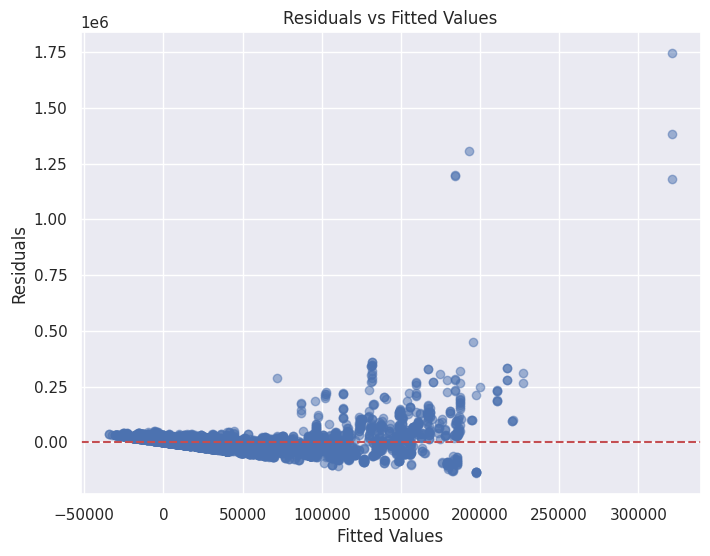

In [35]:
# Get the fitted values
fitted_values = model.fittedvalues

# Calculate residuals
residuals = model.resid

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Part 3: Making a prediction using decision trees
Train a decision tree with the following specifications:

* Split the data into training and testing data.
* Use the DecisionTreeRegressor to fit a model using a
max_depth' of 2 and a random_state` of 42.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


X = df[selected_column1]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor with max_depth=2
dt_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [38]:
#Testing model performance using Root mean square error

from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

32740.04213692654

Let's attempt to enhance our model's performance by setting the *max_depth* hyperparameter to 10.

In [39]:
# Initialize DecisionTreeRegressor with max_depth=2
dt_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

21537.421305678727

The model improved significantly since a lower rmse means a better model

### Part 4 RandomForest
Train a decision tree with the following specifications:

* Separate the features X and target y dataframes
* Split the data into training and testing sets - use a test size of 20% and a random state of 42 for reproducibility
* Fit the model to the training data
* Make predictions on the testing set
* calculate the R-squared score, and the Mean Squared Error (MSE) of the test set predictions.





In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df[selected_column1]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciate a random forest with
rf_model = RandomForestRegressor(max_depth=15, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(r_squared)
print(mse)

0.9205805317760007
367448785.7495514


The rmse for this model is 19168, which is quite better than the initial one from decision trees.

In [41]:
#Identify which features the model considers most significant in predicting the target variable.

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_importances

array([0.10070956, 0.48353026, 0.41576017])

In [42]:
# Get feature names
X.columns

Index(['Year', 'HP', 'Cylinders'], dtype='object')

In [43]:
top_features = pd.Series(data=feature_importances, index=X.columns).sort_values(ascending=False)
top_features

HP           0.48353
Cylinders    0.41576
Year         0.10071
dtype: float64

<Axes: >

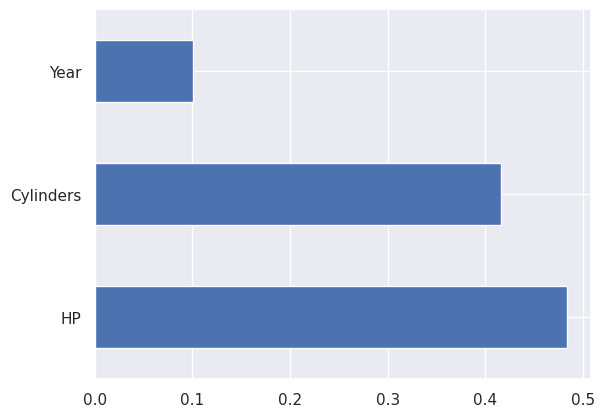

In [44]:
top_features.plot(kind="barh")

This concludes our exercise we can see from the graph above that the HorsePower contributes most to the Price of cars in our dataset and the Year the least.

This makes sense because technically faster cars are generally more expensive than slower cars.

It is important to note that the *max_depth* has a significant influence on the accuracy of our model. Though care should be taken to avoid overfitting when we significantly increase the max_depth.

This has been an exercise to first of all pratctice a bit of Exploratory Data Analysis and more so create regression models(Both Decision trees and Random Forest) in order to be able to predict the Price of cars and also the factors that influence this price the most.